In [12]:
# importing packages
import pandas as pd
import json
import seaborn as sns; sns.set() # has to be installed
import matplotlib.pyplot as plt

In [24]:
# creating dataframe from epochs in json file
with open("exchange_base/own_model_with_lr_0001_epochs_20_scheduler_off_sampler_on_val_result.json") as f:
    json_data = json.load(f)
df = pd.DataFrame(json_data['epochs']) 

In [25]:
# creating dataframe from epochs in json file
with open("exchange_base/own_model_with_lr_01_epochs_20_scheduler_off_sampler_on_val_result.json") as f:
    json_data = json.load(f)
df2 = pd.DataFrame(json_data['epochs']) 

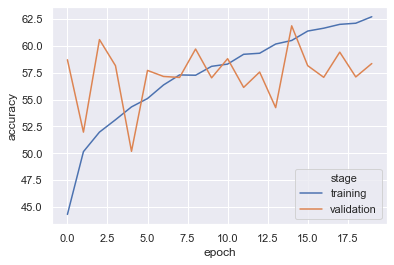

In [26]:
# plotting accuracy
ax = sns.lineplot(x="epoch", y="accuracy", hue="stage", data=df)

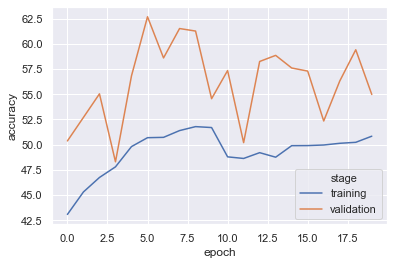

In [27]:
# plotting accuracy
ax = sns.lineplot(x="epoch", y="accuracy", hue="stage", data=df2)

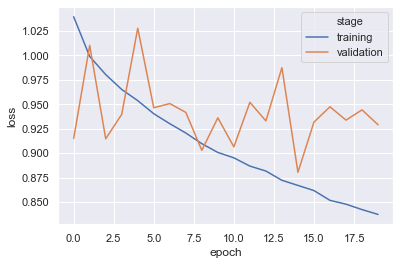

In [28]:
# plotting loss
ax = sns.lineplot(x="epoch", y="loss", hue="stage", data=df)

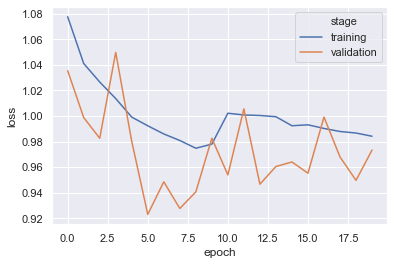

In [29]:
# plotting loss
ax = sns.lineplot(x="epoch", y="loss", hue="stage", data=df2)

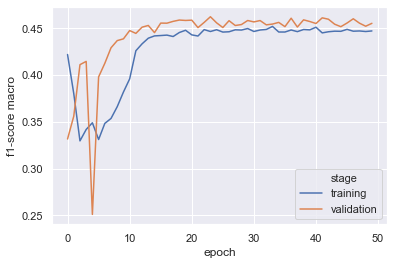

In [19]:
# plotting f1 score macro
ax = sns.lineplot(x="epoch", y="f1-score macro", hue="stage", data=df)

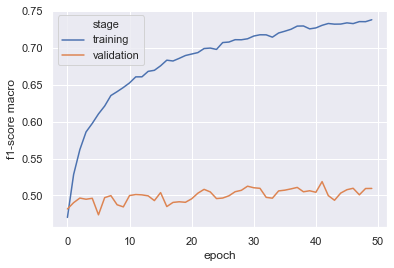

In [20]:
# plotting f1 score macro
ax = sns.lineplot(x="epoch", y="f1-score macro", hue="stage", data=df2)

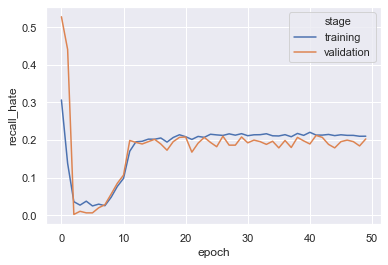

In [22]:
# plotting f1 score macro
ax = sns.lineplot(x="epoch", y="recall_hate", hue="stage", data=df)

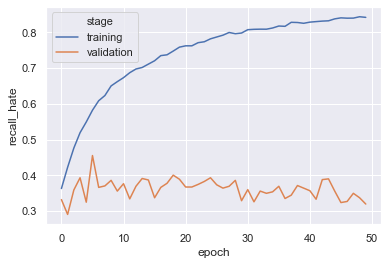

In [23]:
# plotting f1 score macro
ax = sns.lineplot(x="epoch", y="recall_hate", hue="stage", data=df2)

In [6]:
# Printing classification report for last epoch validation
classification_report_str = df[(df.epoch==df.epoch.max()) & (df.stage=='validation')].classification_report_str.values
print('|'+ classification_report_str[0], sep="")

|              precision    recall  f1-score   support

           0       0.10      0.20      0.14       966
           1       0.65      0.45      0.53      6969
           2       0.65      0.75      0.70      8678

    accuracy                           0.59     16613
   macro avg       0.47      0.47      0.46     16613
weighted avg       0.62      0.59      0.59     16613



In [10]:
# Printing classification report of the best epoch according to hate recall
classification_report_str = df[(df.stage=='validation') & (df.recall_hate==df.recall_hate.max())].classification_report_str.values
print('|'+ classification_report_str[0], sep="")

|              precision    recall  f1-score   support

           0       0.07      0.53      0.12       966
           1       0.56      0.57      0.56      6969
           2       0.72      0.20      0.31      8678

    accuracy                           0.37     16613
   macro avg       0.45      0.43      0.33     16613
weighted avg       0.61      0.37      0.40     16613



In [57]:
# Printing classification report for last epoch validation
classification_report_str = df[(df.epoch==df.epoch.max()) & (df.stage=='validation')].classification_report_str.to_string()

In [58]:
classification_report_json= df[(df.epoch==df.epoch.max()) & (df.stage=='validation')].classification_report.to_json()


AttributeError: 'DataFrame' object has no attribute 'classification_report'

In [59]:
print(classification_report_json)

{"3":{"0":{"precision":0.9130434783,"recall":0.0217391304,"f1-score":0.0424671385,"support":966},"1":{"precision":0.6450664801,"recall":0.6613574401,"f1-score":0.6531103868,"support":6969},"2":{"precision":0.6980412917,"recall":0.7597372667,"f1-score":0.7275837334,"support":8678},"accuracy":0.675555288,"macro avg":{"precision":0.7520504167,"recall":0.4809446124,"f1-score":0.4743870863,"support":16613},"weighted avg":{"precision":0.6883206302,"recall":0.675555288,"f1-score":0.6565052176,"support":16613}}}
